In [19]:
import gym
import gym_pdw

import numpy as np
from matplotlib import pyplot as plt

from termcolor import colored

In [47]:
class SARSA:
    
    def update(self, curr_state, curr_action, reward, next_state, next_action, Q, alpha):

        error = reward + (gamma*Q[next_action][next_state[0],next_state[1]]) - Q[curr_action][curr_state[0],curr_state[1]]
        Q[curr_action][curr_state[0],curr_state[1]] = Q[curr_action][curr_state[0],curr_state[1]] + alpha*error
        
        return Q
    
    
    def select_action(self,epsilon, state, Q):
        if np.random.uniform(0,1) < epsilon:
            action = env.random_action()
        else:
            action = np.argmax(Q[:,state[0],state[1]])
        return action
    
    
    def sarsa(self, gamma, alpha, epsilon, episodes):
        
        Q = np.random.rand(env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1])
    
        goal_pos = env.set_goal('A')
#         Q[:,goal_pos[0],goal_pos[1]] = 10
        print(np.amax(Q))


        Terminal_state = goal_pos

        steps = np.zeros([episodes//50])
        avg_reward = np.zeros([episodes//50])

        p=0
        stp = 0
        rew = 0
        
        for episode in range(episodes):

            env.reset()
            curr_state = env.get_state()


            curr_action = self.select_action(epsilon, curr_state, Q)
#             curr_action = env.actual_action(sel_action)

            while True:

                next_state, reward = env.step(curr_state, curr_action)
                
                next_action = self.select_action(epsilon, next_state, Q)
#                 next_action = env.actual_action(sel_next_action)

#                 print('reward == ', reward,"curr_state==", curr_state, "next_state==", next_state, "action==",curr_action)
                
                Q = self.update(curr_state, curr_action, reward, next_state, next_action, Q, alpha)
                
                cur_stp+=1
                cur_rew+=reward
                
                
                curr_state = next_state
                curr_action = next_action

                if curr_state == goal_pos:
                    print("Steps =======================", cur_stp)
#                     print("reward=======================", cur_rew)
                    break

        return avg_reward, steps, Q

In [48]:

def plot_sarsa(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes//50), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes//50), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('SARSA avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('SARSA num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()

In [49]:
# To display the policy learn't
def plot_policy(goal_pos, Q):
    plt.rcParams['figure.figsize'] = [7,7]
    fig, ax = plt.subplots()

    ax.matshow(np.argmax(Q, axis=0))
    for i in range(12):
        for j in range(12):
            if [j,i] == goal_pos:
                ax.text(i,j,'@', va='center', ha='center')
            else:
                c = int(np.argmax(Q, axis=0)[j,i])
                direcs = {0:'↑', 1:'➜', 2:'←', 3:'↓' }
                ax.text(i, j, direcs[c], va='center', ha='center')
# plot_policy([0,11],Q)

0.9974219235452771
0
Steps ======================= 578
Steps ======================= 181
Steps ======================= 660
Steps ======================= 410
Steps ======================= 166
Steps ======================= 73
Steps ======================= 72
Steps ======================= 46
Steps ======================= 174
Steps ======================= 43
Steps ======================= 169
Steps ======================= 58
Steps ======================= 197
Steps ======================= 84
Steps ======================= 94
Steps ======================= 91
Steps ======================= 226
Steps ======================= 57
Steps ======================= 68
Steps ======================= 78
Steps ======================= 94
Steps ======================= 39
Steps ======================= 144
Steps ======================= 126
Steps ======================= 153
Steps ======================= 65
Steps ======================= 65
Steps ======================= 137
Steps ======================= 107
Steps ==

Steps ======================= 46
Steps ======================= 32
Steps ======================= 55
Steps ======================= 26
7
Steps ======================= 14
Steps ======================= 53
Steps ======================= 17
Steps ======================= 27
Steps ======================= 38
Steps ======================= 85
Steps ======================= 64
Steps ======================= 34
Steps ======================= 51
Steps ======================= 35
Steps ======================= 32
Steps ======================= 13
Steps ======================= 19
Steps ======================= 16
Steps ======================= 49
Steps ======================= 38
Steps ======================= 19
Steps ======================= 39
Steps ======================= 34
Steps ======================= 38
Steps ======================= 16
Steps ======================= 40
Steps ======================= 17
Steps ======================= 26
Steps ======================= 33
Steps ======================= 53
Steps ==

Steps ======================= 20
Steps ======================= 20
Steps ======================= 24
Steps ======================= 20
Steps ======================= 18
Steps ======================= 29
Steps ======================= 23
Steps ======================= 26
Steps ======================= 19
Steps ======================= 29
Steps ======================= 34
Steps ======================= 17
Steps ======================= 30
Steps ======================= 23
Steps ======================= 27
Steps ======================= 14
Steps ======================= 27
Steps ======================= 15
Steps ======================= 18
Steps ======================= 13
Steps ======================= 21
Steps ======================= 14
Steps ======================= 27
Steps ======================= 17
Steps ======================= 31
Steps ======================= 21
Steps ======================= 13
Steps ======================= 26
Steps ======================= 26
Steps ======================= 21
Steps ====

Steps ======================= 30
Steps ======================= 30
18
Steps ======================= 24
Steps ======================= 28
Steps ======================= 33
Steps ======================= 17
Steps ======================= 23
Steps ======================= 29
Steps ======================= 14
Steps ======================= 19
Steps ======================= 19
Steps ======================= 23
Steps ======================= 19
Steps ======================= 17
Steps ======================= 26
Steps ======================= 16
Steps ======================= 19
Steps ======================= 30
Steps ======================= 13
Steps ======================= 26
Steps ======================= 39
Steps ======================= 18
Steps ======================= 27
Steps ======================= 27
Steps ======================= 20
Steps ======================= 19
Steps ======================= 22
Steps ======================= 26
Steps ======================= 22
Steps ======================= 32
Steps =

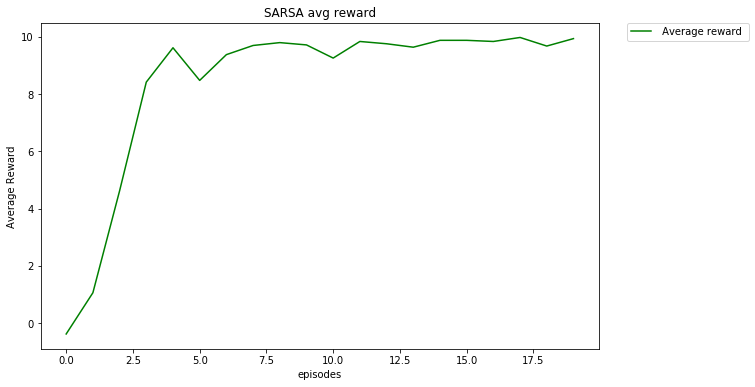

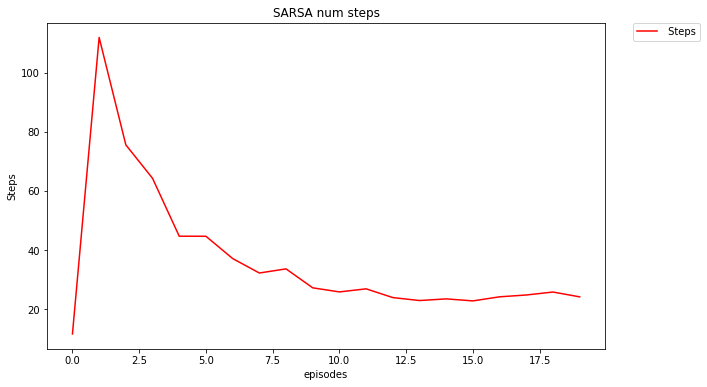

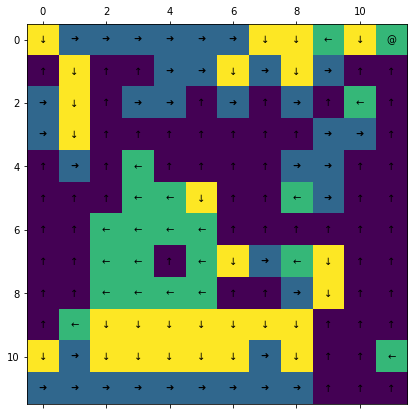

In [56]:
def main():    # parameters
    gamma = 0.9
    alpha = 0.1
    epsilon = 0.1
    episodes = 1000
        
    env = gym.make('gym_pdw:pdw-v0')
    sr = SARSA()
    avg_reward, steps, Q = sr.sarsa(gamma, alpha, epsilon, episodes)
    plot_sarsa(avg_reward, steps, episodes)
    plot_policy([0,11],Q)    

main()

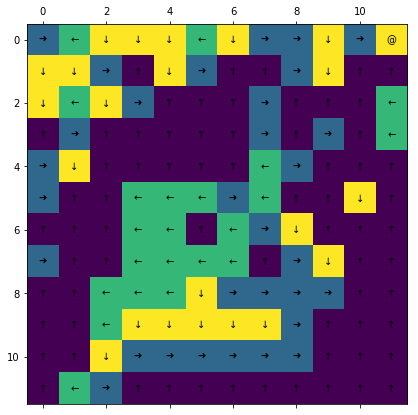

In [57]:
plot_policy([0,11],Q)

In [7]:
print(env.grid)
print(env.goal_positions)
print(env.actions)
print(env.get_start_positions())


[[ 0  0  0  0  0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1 -1 -1 -1 -1 -1  0  0]
 [ 0  0  0  0 -1 -2 -2 -2 -2 -1  0  0]
 [ 0  0  0  0 -1 -2 -3 -3 -2 -1  0  0]
 [ 0  0  0  0 -1 -2 -3 -2 -2 -1  0  0]
 [ 0  0  0  0 -1 -2 -3 -2 -1 -1  0  0]
 [ 0  0  0  0 -1 -2 -2 -2 -1  0  0  0]
 [ 0  0  0  0 -1 -1 -1 -1 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]]
[[0, 11], [2, 9], [7, 8]]
{0: [-1, 0], 1: [0, 1], 2: [0, -1], 3: [1, 0]}
[[6, 0], [7, 0], [10, 0], [11, 0]]


In [8]:
np.argmax(Q, axis=0)


array([[1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2],
       [1, 1, 2, 1, 2, 3, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
       [1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 2, 2, 2, 1, 3, 1, 1, 0, 0],
       [3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 3, 3],
       [3, 2, 2, 2, 2, 3, 3, 1, 1, 1, 3, 3],
       [2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 3, 2, 2, 3, 3, 3, 1, 1, 3, 3, 3],
       [3, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1]])

In [42]:
Q.shape

(4, 12, 12)

0 : [-1,0], # North
1 : [0,1], # East
2 : [0,-1], # West
3 : [1,0] # South 

In [11]:
Q

array([[[ 3.55517706e-01,  1.57674075e-01,  6.75830083e-01,
          5.30301380e-01,  6.08167805e-01,  5.90047882e-01,
          1.97442777e-01,  5.34708158e-01,  1.19295240e+00,
          3.65282433e+00,  4.58332018e+00,  4.06548209e-02],
        [ 3.98032616e-02,  7.49824065e-01,  2.47963004e-01,
          2.49259915e-01,  6.53436081e-01,  2.86332393e-01,
          3.84285177e-01,  9.96333523e-01,  1.83807180e+00,
          3.84891519e+00,  5.92437989e+00,  7.31390493e+00],
        [ 4.23318797e-01,  4.25431530e-01,  6.95259775e-01,
          2.81215805e-01,  5.83706240e-01,  6.10066533e-01,
          5.08781132e-01,  5.96249094e-01,  1.49037938e+00,
          2.72465077e+00,  3.55407662e+00,  2.42891710e+00],
        [ 5.66477424e-01,  3.19673824e-01,  2.94453296e-01,
          3.75989792e-01,  2.73028479e-01,  3.34080474e-01,
          3.49771048e-01,  6.15466865e-02,  1.98236466e-01,
          1.84362528e+00,  1.52459899e+00,  1.24127691e+00],
        [ 6.86126964e-01,  3.0939322

In [12]:
# Q = np.zeros((env.observation_space, env.action_space))
env.action_space.n

4

In [13]:
env = gym.make('FrozenLake-v0')

In [14]:
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [15]:
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [16]:
from collections import defaultdict
q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
q_table[tuple([10,10]),4]

[0.0, 0.0, 0.0, 0.0]

In [17]:
q = np.zeros([tuple([12,12]),0]) 

TypeError: 'tuple' object cannot be interpreted as an integer

In [ ]:
q = np.zeros([12,12,4])
q[11,11][2]

In [ ]:
q[2,11,11]
s = np.array([11,11])
print(s.shape)
s = np.squeeze(s,1)
print(s.shape)


In [ ]:
Q = np.ones([4,12,12])
Q[1,11,11] = 5
Q[2,5,5] = 4
np.argmax(Q,axis=0)